In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
products=pd.read_csv('cproducts.csv')
products.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,1955-07-21,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


In [9]:
products.dtypes

customerID                     object
DOB                            object
Gender                         object
State                          object
PinCode                       float64
transactionDate                object
store_code                      int64
store_description              object
till_no                         int64
transaction_number_by_till      int64
promo_code                     object
promotion_description          object
product_code                    int64
product_description            object
sale_price_after_promo        float64
discountUsed                   object
dtype: object

In [10]:
products.isnull().sum()

customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
promotion_description         8510
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64

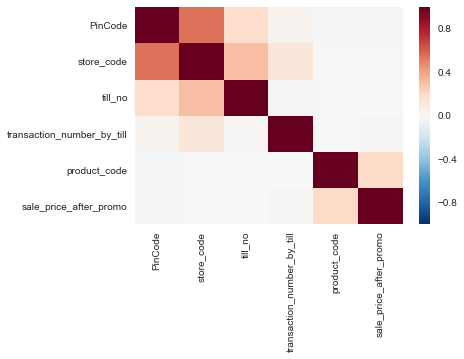

In [11]:
products.shape
sns.heatmap(products.corr())

In [12]:
## fill missing values

products['promotion_description'].fillna('no_promo', inplace=True)
products['Gender'].fillna('no_gender', inplace=True)
products['State'].fillna('no_state', inplace=True)
products['PinCode'].fillna(-1, inplace=True)
products['DOB'].fillna("1", inplace=True)

In [13]:
products.isnull().sum()

customerID                    0
DOB                           0
Gender                        0
State                         0
PinCode                       0
transactionDate               0
store_code                    0
store_description             0
till_no                       0
transaction_number_by_till    0
promo_code                    0
promotion_description         0
product_code                  0
product_description           0
sale_price_after_promo        0
discountUsed                  0
dtype: int64

In [14]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in products.columns:
    if products[c].dtype == 'object' and c not in ['store_description','customerID','transactionDate']:
        products[c] = le.fit_transform(products[c])

In [204]:
stores=list(set(products['store_code']))

cluster_labels = []
cluster_store = []
cluster_data = []
cluster_customers = []
cluster_score = []



In [205]:
from sklearn.preprocessing import RobustScaler
for i in stores:
    cld=products[products['store_code']==i]
    cluster_customers.append(cld['customerID'])
    cld.drop(['store_code','customerID','store_description','transactionDate','DOB','Gender','till_no','State',
              'promotion_description','transaction_number_by_till','product_code',
              'sale_price_after_promo','promo_code','product_description'],axis=1,inplace=True)
    rbs = RobustScaler()
    cld2 = rbs.fit_transform(cld)
    
    
    km1=KMeans(n_clusters=4,init='random',n_init=4,algorithm='auto',n_jobs=2).fit(cld2)
    label = km1.predict(cld2)
    
    s_score = silhouette_score(cld2, label)
    cluster_score.append(s_score)
    
    cluster_labels.append(label)
    cluster_store.append(np.repeat(i, cld.shape[0]))
    cluster_data.append(cld2)

/home/ashish/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [206]:
# check mean score per store
np.mean(cluster_score)

0.94523491295970963

In [207]:
## merge list into ndarray
cluster_data = np.concatenate(cluster_data)## check if the array has same rows as products file - Yes!


In [208]:
## check if the array has same rows as products file - Yes!
cluster_data.shape

(11972, 2)

In [209]:
## convert nested lists as 1d array
cluster_customers = np.concatenate(cluster_customers)
cluster_store = np.concatenate(cluster_store)
cluster_labels = np.concatenate(cluster_labels)

In [210]:
## create submission files
sub1 = pd.DataFrame({'customerID':cluster_customers, 'store_code':cluster_store, 'cluster':cluster_labels})

In [211]:
np.savetxt('subOne_18.txt', cluster_data)
sub1.to_csv('subtwo_18.csv', index=False)

In [212]:
products.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,3108,1,20,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,2213,2010,1000446431,4269,55.00,24
1,BBID_20485,594,0,36,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,2213,2010,1000010431,5121,30.00,24
2,BBID_20498,4175,0,21,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,216,23,1000077851005,1617,418.95,24
3,BBID_20499,5224,1,21,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,2213,2010,1000443231,4364,70.00,24
4,BBID_204110,5596,1,20,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,225,1723,300481741,3472,34.20,24


In [213]:
cluster_data

array([[ -1.59362353e+04,   0.00000000e+00],
       [ -1.59362941e+04,   0.00000000e+00],
       [  9.94047059e+03,   0.00000000e+00],
       ..., 
       [  3.23488889e+03,  -3.57142857e-01],
       [  1.88888889e+00,  -2.85714286e-01],
       [  0.00000000e+00,  -4.28571429e-01]])